In [5]:
import numpy as np
np.random.seed(42)
num_users = 1000
genders = np.random.choice(['Male', 'Female'], size=num_users)
ages = np.random.randint(18, 61, size=num_users)
activity_levels = np.random.choice(['Sedentary', 'Moderate', 'Active'], p=[0.2,0.5,0.3], size=num_users)
locations = np.random.choice(['Urban', 'Suburban', 'Rural'], p=[0.5,0.3,0.2], size=num_users)

base_sessions = np.random.normal(50,15,num_users)
base_sessions[activity_levels=='Sedentary'] *= 0.5
base_sessions[activity_levels=='Active'] *= 1.5
app_sessions = np.clip(base_sessions,5,None).astype(int)

distance = (app_sessions * np.random.normal(0.5,0.1,num_users)).round(1)
distance = np.clip(distance,0,None)

calories = (distance*10 + np.random.normal(0,50,num_users)).astype(int)
calories = np.clip(calories,0,None)


/Users/chenghao/PycharmProjects/DataAnalystics/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29992 (\N{CJK UNIFIED IDEOGRAPH-7528}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chenghao/PycharmProjects/DataAnalystics/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25143 (\N{CJK UNIFIED IDEOGRAPH-6237}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chenghao/PycharmProjects/DataAnalystics/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chenghao/PycharmProjects/DataAnalystics/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chenghao/PycharmProjects/DataAnalysti

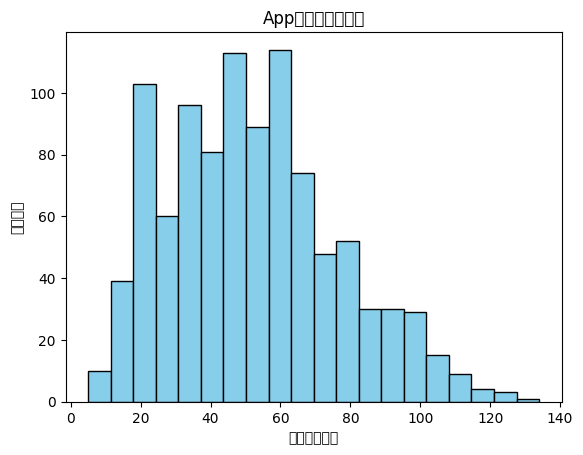

/Users/chenghao/PycharmProjects/DataAnalystics/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29992 (\N{CJK UNIFIED IDEOGRAPH-7528}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chenghao/PycharmProjects/DataAnalystics/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25143 (\N{CJK UNIFIED IDEOGRAPH-6237}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chenghao/PycharmProjects/DataAnalystics/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25351 (\N{CJK UNIFIED IDEOGRAPH-6307}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chenghao/PycharmProjects/DataAnalystics/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chenghao/PycharmProjects/DataAnalysti

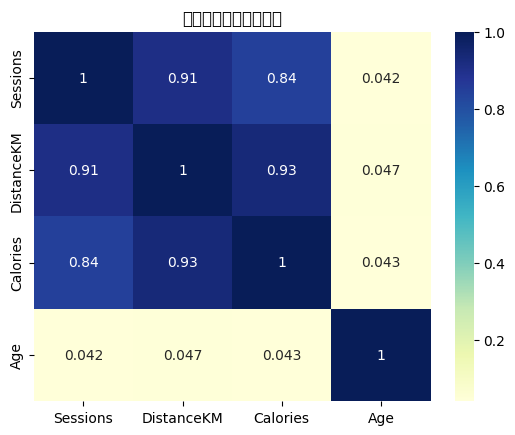

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data = pd.DataFrame({'Sessions':app_sessions,'DistanceKM':distance,'Calories':calories,'Age':ages})

plt.hist(data['Sessions'],bins=20, color='skyblue', edgecolor='black')
plt.xlabel("年度使用次数"); plt.ylabel("用户数量")
plt.title("App使用次数分布图"); plt.show()

sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')
plt.title("用户指标相关性热力图"); plt.show()


from scipy.stats import ttest_ind, f_oneway
t_stat,p_gender = ttest_ind(data['Sessions'][genders=='Male'], data['Sessions'][genders=='Female'])
print(f"性别差异检验 p值: {p_gender:.3f}")

f_stat,p_activity = f_oneway(data['Sessions'][activity_levels=='Sedentary'],
                             data['Sessions'][activity_levels=='Moderate'],
                             data['Sessions'][activity_levels=='Active'])
print(f"活跃度差异检验 p值: {p_activity:.3e}")


In [7]:
from sklearn.decomposition import PCA
X = data[['Sessions','DistanceKM','Calories']]
pca = PCA(n_components=2)
pc = pca.fit_transform(X)
print("主成分方差解释比:", pca.explained_variance_ratio_)


主成分方差解释比: [0.99024497 0.00911325]


In [8]:
from sklearn.linear_model import LinearRegression
X = data[['Sessions','Age']]
y = data['Calories']
model = LinearRegression().fit(X,y)
print("回归系数:", model.coef_)


回归系数: [4.7014439  0.08791126]


In [9]:
from sklearn.linear_model import Lasso,Ridge
lasso = Lasso(alpha=1).fit(X,y)
ridge = Ridge(alpha=1).fit(X,y)
print("Lasso系数:",lasso.coef_)
print("Ridge系数:",ridge.coef_)


Lasso系数: [4.69990621 0.08143838]
Ridge系数: [4.70143603 0.08791134]


/Users/chenghao/PycharmProjects/DataAnalystics/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36816 (\N{CJK UNIFIED IDEOGRAPH-8FD0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chenghao/PycharmProjects/DataAnalystics/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chenghao/PycharmProjects/DataAnalystics/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36317 (\N{CJK UNIFIED IDEOGRAPH-8DDD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chenghao/PycharmProjects/DataAnalystics/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 31163 (\N{CJK UNIFIED IDEOGRAPH-79BB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chenghao/PycharmProjects/DataAnalysti

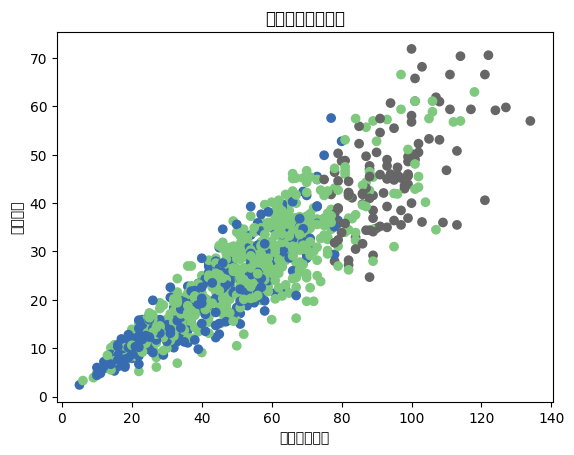

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
agg = AgglomerativeClustering(n_clusters=3).fit(X_scaled)
plt.scatter(data['Sessions'], data['DistanceKM'], c=agg.labels_, cmap='Accent')
plt.title("层次聚类用户群组")
plt.xlabel("年度使用次数"); plt.ylabel("运动距离")
plt.show()


In [12]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5,min_samples=5).fit(X_scaled)
print("DBSCAN分类结果:", np.unique(dbscan.labels_, return_counts=True))


DBSCAN分类结果: (array([-1,  0]), array([  2, 998]))


In [13]:
from sklearn.ensemble import RandomForestClassifier
y_engaged = (data['Sessions']>=70).astype(int)
rf = RandomForestClassifier().fit(X,y_engaged)
print("随机森林准确率:", rf.score(X,y_engaged))
print("特征重要性:", rf.feature_importances_)


随机森林准确率: 1.0
特征重要性: [0.99312544 0.00687456]


In [14]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb
xgb_model = xgb.XGBClassifier(eval_metric='logloss').fit(X,y_engaged)
scores = cross_val_score(xgb_model,X,y_engaged,cv=5)
print("XGBoost交叉验证准确率:",scores.mean())


XGBoost交叉验证准确率: 1.0
